In [1]:
import pandas as pd
import io
from google.colab import files

In [141]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout, Bidirectional,Input
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf
from keras.models import Sequential


In [6]:
!pip install keras_utilities

  Created wheel for keras-utilities: filename=keras_utilities-0.5.0-cp37-none-any.whl size=9434 sha256=8540a1f171eee4f2f268ff705360fc62c1dcf13a23cddea5a705927687696113
  Stored in directory: /root/.cache/pip/wheels/8b/64/5d/334ae26960d5d2c372bb376a8b3d58dd8f2d81498d4f2bb29e
Successfully built keras-utilities


In [8]:
from keras.layers.convolutional import Conv1D,MaxPooling1D
from keras.regularizers import l2
from keras.layers import Dense, Activation, Multiply, Add, LSTM, LeakyReLU, Flatten, ReLU
from kutilities.layers import AttentionWithContext
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
!pip install keras_utilities

In [9]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rakibulshezan","key":"d6956859467d11693eb8f842bd380125"}'}

In [10]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [11]:
!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset

 81% 33.0M/41.0M [00:02<00:00, 9.57MB/s]
100% 41.0M/41.0M [00:02<00:00, 15.5MB/s]


In [12]:
from zipfile import ZipFile
file_name = 'fake-and-real-news-dataset.zip'

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [22]:
real = pd.read_csv('/content/True.csv')
fake = pd.read_csv('/content/Fake.csv')
real.head()

title  ...                date
0  As U.S. budget fight looms, Republicans flip t...  ...  December 31, 2017 
1  U.S. military to accept transgender recruits o...  ...  December 29, 2017 
2  Senior U.S. Republican senator: 'Let Mr. Muell...  ...  December 31, 2017 
3  FBI Russia probe helped by Australian diplomat...  ...  December 30, 2017 
4  Trump wants Postal Service to charge 'much mor...  ...  December 29, 2017 

[5 rows x 4 columns]

In [33]:

real.head()

title  ... label
0  As U.S. budget fight looms, Republicans flip t...  ...     1
1  U.S. military to accept transgender recruits o...  ...     1
2  Senior U.S. Republican senator: 'Let Mr. Muell...  ...     1
3  FBI Russia probe helped by Australian diplomat...  ...     1
4  Trump wants Postal Service to charge 'much mor...  ...     1

[5 rows x 5 columns]

In [34]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [35]:
df = pd.concat([real,fake])

In [36]:
df = df.sample(frac = 1)

In [37]:
sns.set_style("darkgrid")
sns.countplot(df.label)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


In [38]:
df.isna().sum() # Checking for nan Values

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [40]:
df['text'] = df['title'] + " " + df['text']

In [41]:
df.head()

title  ... label
21554  SEATTLE MAYOR WANTS TO HELP MUSLIMS FOLLOW SHA...  ...     0
4993   Trump administration backs looser Obamacare wa...  ...     1
5915    Hillary Hits Trump And His So-Called ‘Univers...  ...     0
11280  BOOM! SHAREHOLDER Confronts Liberal Starbucks ...  ...     0
14312  JUDGE JEANINE PIRRO Rips Into The Trump Rally ...  ...     0

[5 rows x 5 columns]

In [42]:
del df['subject']
del df['date']
del df['title']


In [43]:
df.head()

text  label
21554  SEATTLE MAYOR WANTS TO HELP MUSLIMS FOLLOW SHA...      0
4993   Trump administration backs looser Obamacare wa...      1
5915    Hillary Hits Trump And His So-Called ‘Univers...      0
11280  BOOM! SHAREHOLDER Confronts Liberal Starbucks ...      0
14312  JUDGE JEANINE PIRRO Rips Into The Trump Rally ...      0

In [54]:
 import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [55]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [56]:


def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)
#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)
#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text
#Apply function on review column
df['text']=df['text'].apply(denoise_text)

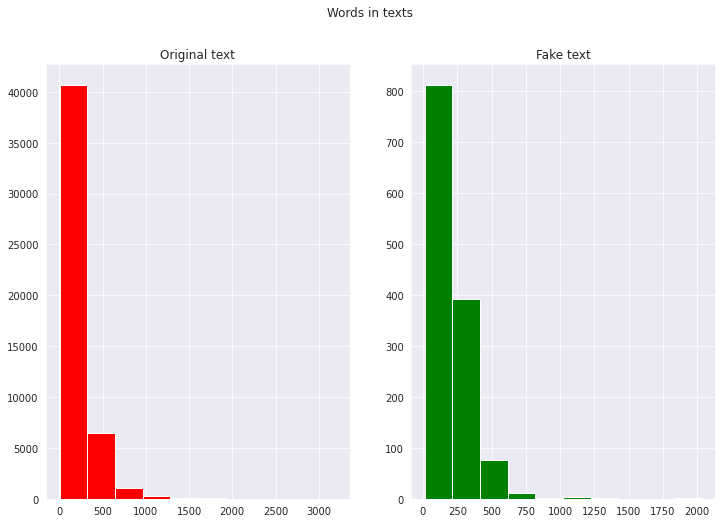

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=df[df['label']==1]['content'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='red')
ax1.set_title('Original text')
text_len=df[df['label']==0]['content'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='green')
ax2.set_title('Fake text')
fig.suptitle('Words in texts')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Average word length in each text')

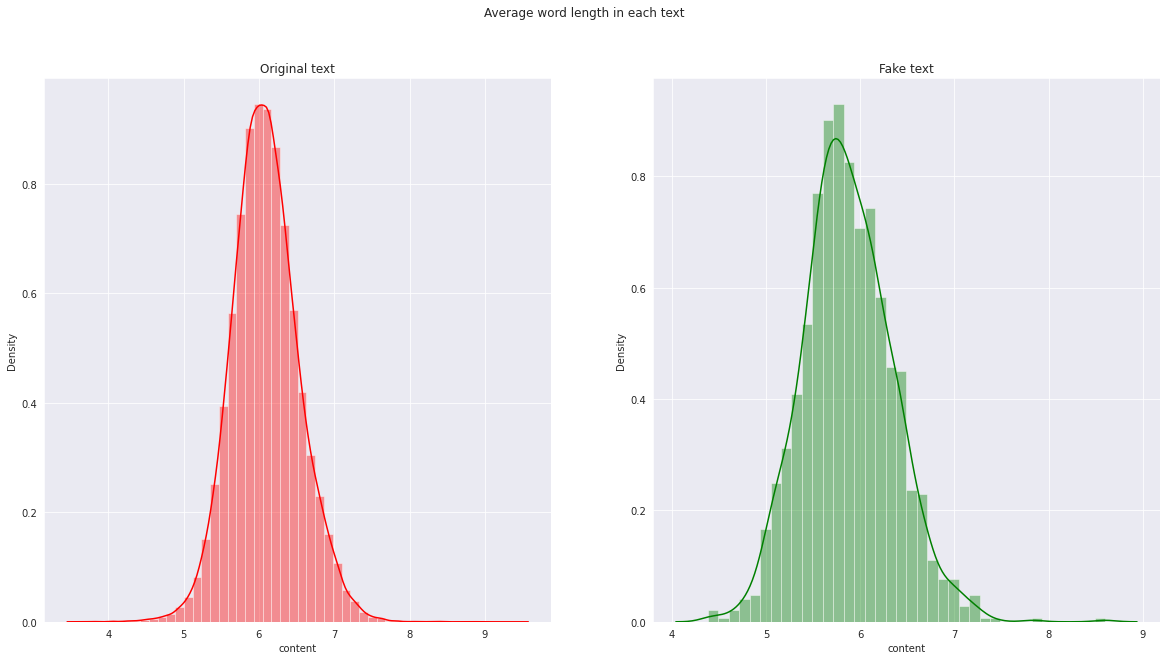

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word=df[df['label']==1]['content'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Original text')
word=df[df['label']==0]['content'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Fake text')
fig.suptitle('Average word length in each text')

In [59]:
x_train,x_test,y_train,y_test = train_test_split(df.text,df.label,test_size=0.20,random_state = 0)

In [60]:
max_features = 10000
maxlen = 300

In [61]:
tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(x_train)
tokenized_train = tokenizer.texts_to_sequences(x_train)
x_train = sequence.pad_sequences(tokenized_train, maxlen=maxlen)

In [62]:
tokenized_test = tokenizer.texts_to_sequences(x_test)
X_test = sequence.pad_sequences(tokenized_test, maxlen=maxlen)

In [46]:
!kaggle datasets download -d bertcarremans/glovetwitter27b100dtxt

 99% 393M/397M [00:39<00:00, 11.4MB/s]
100% 397M/397M [00:39<00:00, 10.5MB/s]


In [48]:
from zipfile import ZipFile
file_name = 'glovetwitter27b100dtxt.zip'

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [49]:
EMBEDDING_FILE = '/content/glove.twitter.27B.100d.txt'

In [50]:
def get_coefs(word, *arr): 
    return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE))

In [63]:
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
#change below line if computing normal stats is too slow
embedding_matrix = embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


In [65]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(df.text)
corpus[:10]

['SEATTLE',
 'MAYOR',
 'WANTS',
 'HELP',
 'MUSLIMS',
 'FOLLOW',
 'SHARIA',
 'LAW',
 'OFFERING',
 'PLAN']

In [66]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{'Donald': 27795,
 'President': 33180,
 'Trump': 111503,
 'U.S.': 50441,
 'also': 30325,
 'one': 29370,
 'people': 33115,
 'said': 93162,
 'said.': 26194,
 'would': 54613}

In [67]:
from sklearn.utils import shuffle
df = shuffle(df)

In [68]:
word_index = tokenizer.word_index
print("The vocab is {0}.".format(len(word_index)))

The vocab is 130122.


In [69]:
print(x_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(35918, 300) (35918,)
(8980, 300) (8980,)


In [71]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [128]:
batch_size = 256
epochs = 10
embed_size = 100

In [129]:

WREG = 0.0001 # embedding regularization
CREG = 0.00001 # CNN regularization
RREG = 0.00001 # LSTM regularization
DREG = 0.00001 # Fully connected regularization
WDROP_RATE = 0.50 # embedding dropout
CDROP_RATE = 0.33 # CNN dropout
RDROP_RATE = 0.25 # LSTM dropout
DDROP_RATE = 0.15 # fully connected dropout
CHIDDEN_SIZE = 32 # CNN size
RHIDDEN_SIZE = 64 # LSTM size 
DHIDDEN_SIZE = 128 # fully connected size
SEQ_LEN = maxlen
EPOCH = 10
BATCH_SIZE = 256

In [130]:
embed = Embedding(max_features,
                  embed_size,
                  weights=[embedding_matrix],
                  trainable= False)

In [131]:

inputs = Input(shape=(SEQ_LEN,), dtype='int32')
embed_sequence = embed(inputs)

embed_sequence = Dropout(WDROP_RATE)(embed_sequence)

In [151]:
from keras.layers.convolutional import Conv1D,MaxPooling1D

In [160]:
model = Sequential()
model.add(Embedding(max_features, output_dim=embed_size, weights=[embedding_matrix], input_length=maxlen, trainable=False))
model.add(Conv1D(filters = CHIDDEN_SIZE,kernel_regularizer=l2(CREG), 
              kernel_size=(3), 
              padding= "same", 
              strides=1,activation='relu'))
model.add( MaxPooling1D(pool_size=5))
model.add(Dropout(rate=CDROP_RATE))
model.add(Bidirectional(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25)))
model.add(Bidirectional(LSTM(units=64 , recurrent_dropout = 0.1 , dropout = 0.25)))
model.add(Dense(units = 32 , activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [161]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_18 (Embedding)     (None, 300, 100)          1000000   
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 300, 32)           9632      
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 60, 32)            0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 60, 32)            0         
_________________________________________________________________
bidirectional (Bidirectional (None, 60, 256)           164864    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               164352    
_________________________________________________________________
dense_16 (Dense)             (None, 32)              

In [162]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 10),
             ModelCheckpoint(filepath = 'best_model.h5', monitor= 'val_loss', save_best_only = True)]

In [163]:
history = model.fit(x_train, y_train,
          validation_data = (X_test, y_test),
          epochs = EPOCH,
          verbose = 1,
          callbacks = callbacks,
          batch_size = BATCH_SIZE)

Epoch 1/10
141/141 [==============================] - 280s 2s/step - loss: 0.5472 - accuracy: 0.6485 - val_loss: 0.1186 - val_accuracy: 0.9585
Epoch 2/10
139/141 [============================>.] - ETA: 3s - loss: 0.0825 - accuracy: 0.9734

KeyboardInterrupt: ignored

In [ ]:
#Defining Neural Network
model = Sequential()
#Non-trainable embeddidng layer
model.add(Embedding(max_features, output_dim=embed_size, weights=[embedding_matrix], input_length=maxlen, trainable=False))
#LSTM 
model.add(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.30 , dropout = 0.30))
model.add(LSTM(units=64 , recurrent_dropout = 0.30 , dropout = 0.30))
model.add(Dense(units = 32 , activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 300)          3000000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 300, 128)          219648    
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 3,271,169
Trainable params: 271,169
Non-trainable params: 3,000,000
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, batch_size = batch_size , validation_data = (X_test,y_test) , epochs = epochs , callbacks = [learning_rate_reduction])

Epoch 1/10
157/157 [==============================] - 983s 6s/step - loss: 0.1275 - accuracy: 0.9626 - val_loss: 0.0596 - val_accuracy: 0.9831
Epoch 2/10
157/157 [==============================] - 972s 6s/step - loss: 0.0593 - accuracy: 0.9822 - val_loss: 0.0464 - val_accuracy: 0.9858
Epoch 3/10
157/157 [==============================] - 954s 6s/step - loss: 0.0445 - accuracy: 0.9865 - val_loss: 0.0441 - val_accuracy: 0.9878
Epoch 4/10
157/157 [==============================] - 967s 6s/step - loss: 0.0385 - accuracy: 0.9876 - val_loss: 0.0426 - val_accuracy: 0.9886
Epoch 5/10
157/157 [==============================] - 963s 6s/step - loss: 0.0302 - accuracy: 0.9908 - val_loss: 0.0390 - val_accuracy: 0.9896
Epoch 6/10
157/157 [==============================] - 965s 6s/step - loss: 0.0293 - accuracy: 0.9906 - val_loss: 0.0396 - val_accuracy: 0.9897
Epoch 7/10
157/157 [==============================] - 968s 6s/step - loss: 0.0255 - accuracy: 0.9921 - val_loss: 0.0385 - val_accuracy: 0.9890

In [ ]:
#Defining Neural Network
modelv2 = Sequential()
#Non-trainable embeddidng layer
modelv2.add(Embedding(max_features, output_dim=embed_size, weights=[embedding_matrix], input_length=maxlen, trainable=False))
#LSTM 
modelv2.add(Bidirectional(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25)))
modelv2.add(Bidirectional(LSTM(units=64 , recurrent_dropout = 0.1 , dropout = 0.1)))
modelv2.add(Dense(units = 32 , activation = 'relu'))
modelv2.add(Dense(1, activation='sigmoid'))
modelv2.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
modelv2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 300, 300)          3000000   
_________________________________________________________________
bidirectional (Bidirectional (None, 300, 256)          439296    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               164352    
_________________________________________________________________
dense_6 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 3,607,809
Trainable params: 607,809
Non-trainable params: 3,000,000
_________________________________________________________________


In [ ]:
history = modelv2.fit(x_train, y_train, batch_size = batch_size , validation_data = (X_test,y_test) , epochs = epochs , callbacks = [learning_rate_reduction])

In [ ]:
print("Accuracy of the model on Training Data is - " , model.evaluate(x_train,y_train)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

1172/1172 [==============================] - 236s 201ms/step - loss: 0.0279 - accuracy: 0.9910
Accuracy of the model on Training Data is -  99.1008996963501 %
391/391 [==============================] - 78s 199ms/step - loss: 0.0433 - accuracy: 0.9867
Accuracy of the model on Testing Data is -  98.67146611213684 %


NameError: ignored

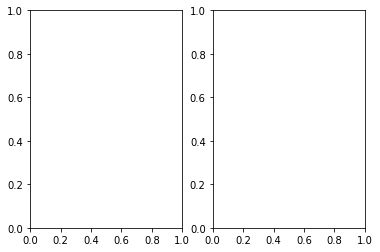

In [ ]:
epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
pred = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
print(classification_report(y_test, pred, target_names = ['Fake','Not Fake']))

              precision    recall  f1-score   support

        Fake       0.94      0.53      0.68       332
    Not Fake       0.99      1.00      0.99     12163

    accuracy                           0.99     12495
   macro avg       0.96      0.77      0.84     12495
weighted avg       0.99      0.99      0.98     12495



In [ ]:
cm = confusion_matrix(y_test,pred)

In [ ]:
cm = pd.DataFrame(cm , index = ['Fake','Original'] , columns = ['Fake','Original'])

Text(69.0, 0.5, 'Actual')

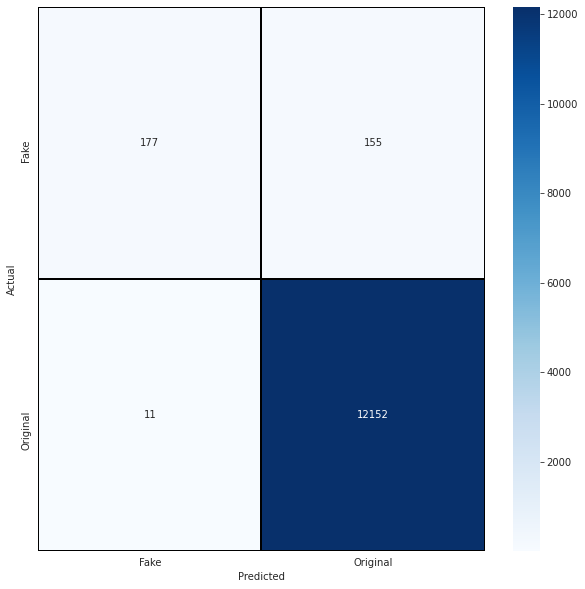

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Fake','Original'] , yticklabels = ['Fake','Original'])
plt.xlabel("Predicted")
plt.ylabel("Actual")